In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [2]:
df = pd.read_csv("data_clean.csv")

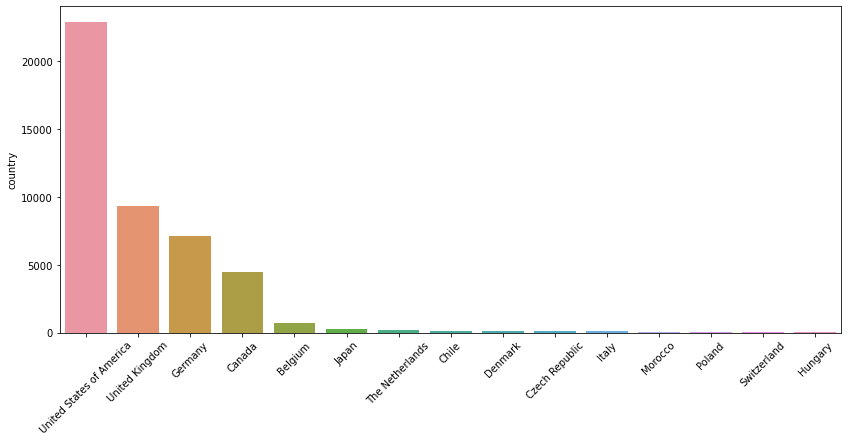

In [3]:
# Where the reviewed beers are from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=df.country.value_counts().head(15).index,y=df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

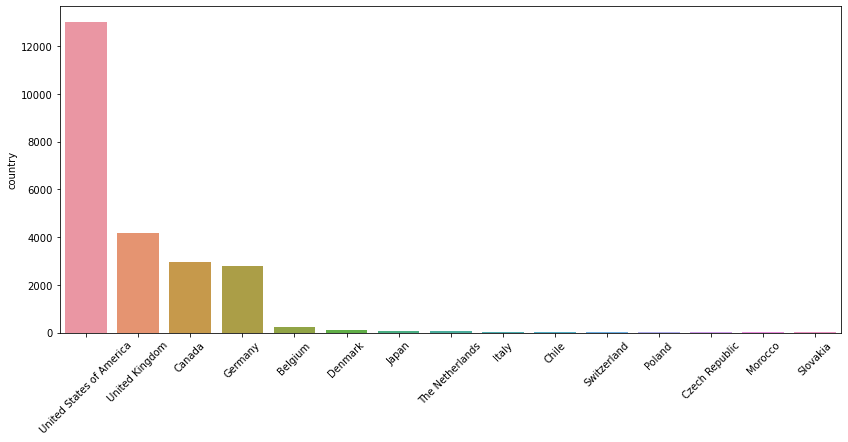

In [4]:
# Where the unique reviewed beers from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=df.drop_duplicates(['beer_name']).country.value_counts().head(15).index,y=df.drop_duplicates(['beer_name']).country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

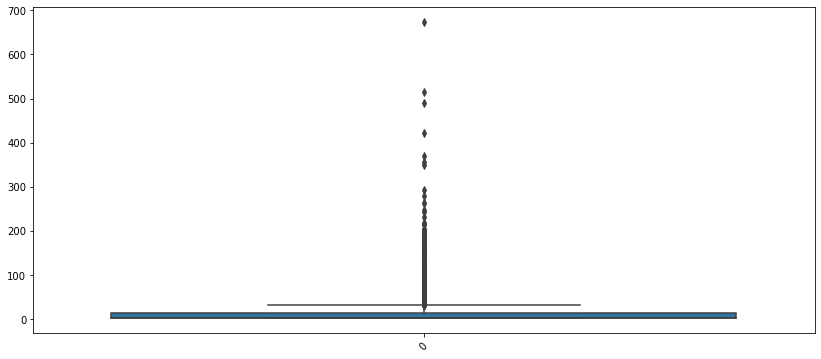

In [5]:
# amount of reviews per reviewer
plt.figure(figsize=(14,6))
ax = sns.boxplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

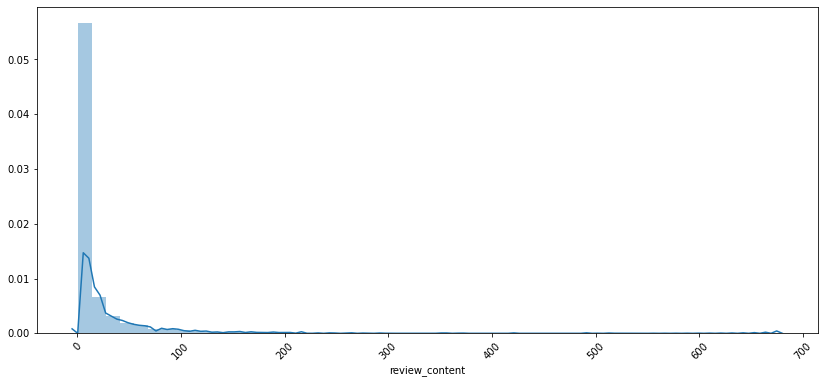

In [6]:
# easier to view than the boxplot
plt.figure(figsize=(14,6))
ax = sns.distplot(df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

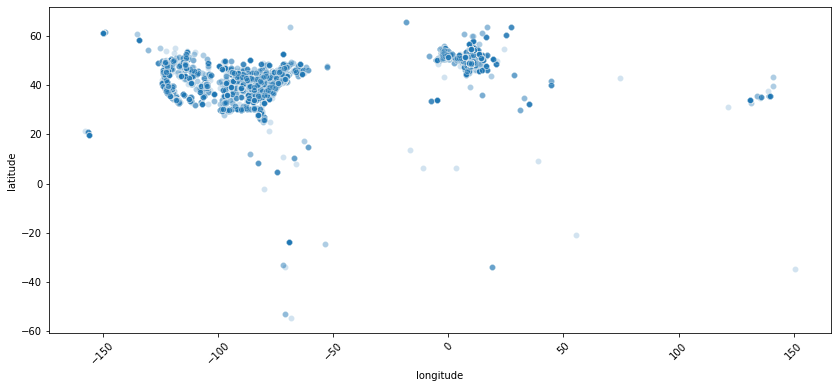

In [7]:
# visual look of where the beers are from
plt.figure(figsize=(14,6))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,alpha=0.2)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [8]:
# Beer Categories
df.type.value_counts().head(15)

 IPA                                       3778
 IPA - Hazy / NEIPA                        3511
 Stout - Imperial Flavored                 2368
 IIPA DIPA - Imperial / Double IPA         2010
 IIPA DIPA - Hazy / Double NEIPA           2003
 Pale Ale - American / APA                 1966
 Sour / Wild Beer - Flavored               1539
 Stout - Imperial                          1424
 Pilsener / Pils / Pilsner                 1149
 Pale Lager - North Am. / Light / Rice     1138
 ISA - Session IPA                         1069
 Sour / Wild Beer                           880
 Blonde Ale / Golden Ale                    832
 Helles / Dortmunder Export                 787
 Saison / Farmhouse / Grisette              778
Name: type, dtype: int64

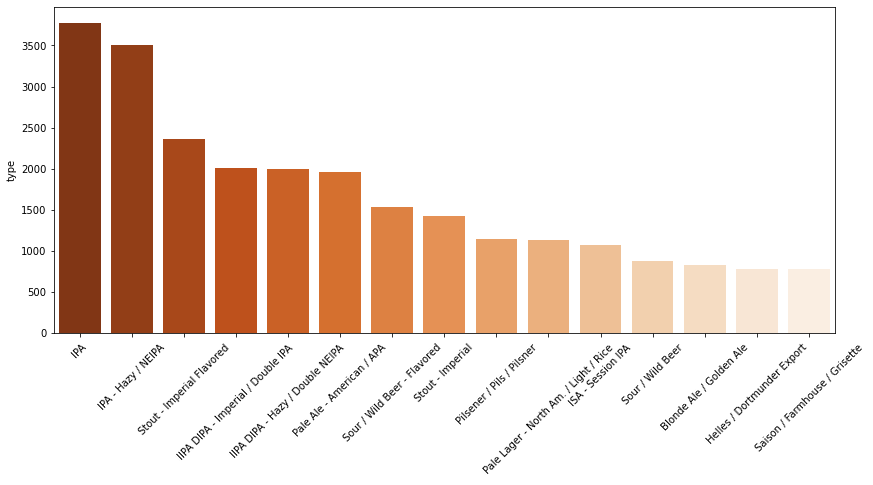

In [9]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x = df.type.value_counts().head(15).index,y=df.type.value_counts().head(15), palette='Oranges_r')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [10]:
# GLobal Breweries
df.brewery_name.value_counts().head(15)


Cloudwater Brew Co                                        512
Founders Brewing Company (Mahou San Miguel)               497
Northern Monk Brew Co.                                    394
Evil Twin Brewing                                         343
Sierra Nevada Brewing Company                             339
Stone Brewing                                             317
Miller Brewing Company (Molson Coors)                     311
Lidl Europe                                               288
Cigar City Brewing (CANarchy Craft Brewery Collective)    287
Firestone Walker Brewing (Duvel-Moortgat)                 269
Thornbridge Brewery                                       262
Verdant Brewing Co                                        259
Collective Arts Brewing                                   257
Anheuser-Busch InBev (AB InBev)                           254
Deya Brewing Company                                      223
Name: brewery_name, dtype: int64

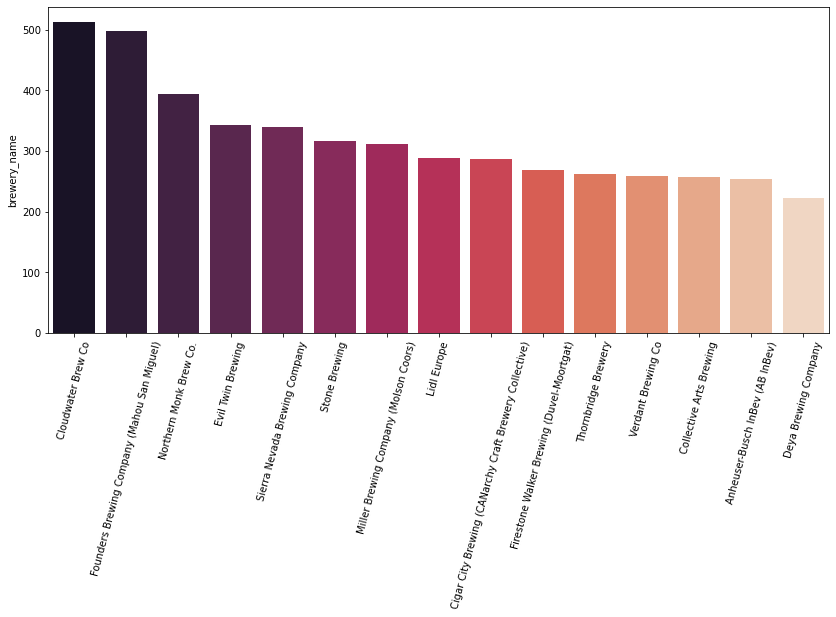

In [11]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x = df.brewery_name.value_counts().head(15).index,y=df.brewery_name.value_counts().head(15), palette='rocket')
plt.setp(ax.get_xticklabels(), rotation=75)
plt.show()

In [12]:
# Top Breweries UK 
df.brewery_name[df.country == "United Kingdom"].value_counts().head(15)

Cloudwater Brew Co                                506
Northern Monk Brew Co.                            381
Thornbridge Brewery                               250
Verdant Brewing Co                                247
Deya Brewing Company                              219
Siren Craft Brew                                  204
Wylam Brewery                                     201
The Kernel Brewery                                183
Magic Rock Brewing (Lion Co. - Kirin Holdings)    178
Buxton Brewery                                    167
Fuller's Brewery (Asahi)                          160
Aldi (UK)                                         146
Gipsy Hill Brewing Company                        135
North Brewing Co                                  127
North Brewing Co (England)                        117
Name: brewery_name, dtype: int64

Amount of Ratings per Beer
count    23675.000000
mean        77.375502
std        288.816012
min          0.000000
25%          1.000000
50%          6.000000
75%         30.000000
max       5475.000000
Name: rb_rating_number, dtype: float64


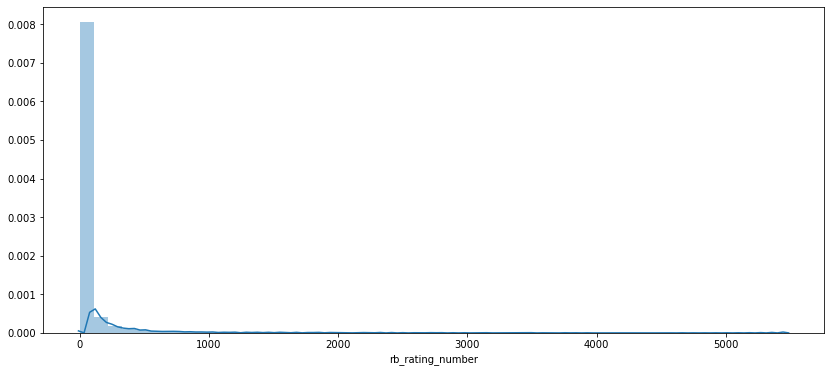

Top 10 most rated beers and their rating
                                             beer_name  rb_rating_number  \
1849                                  Westmalle Tripel            5475.0   
1232                    Lagunitas India Pale Ale (IPA)            4661.0   
279                Sierra Nevada Pale Ale (Bottle/Can)            4631.0   
2971               Dogfish Head 90 Minute Imperial IPA            4341.0   
215                          Samuel Adams Boston Lager            4328.0   
1964                        Stone IPA (India Pale Ale)            4163.0   
1831                              Arrogant Bastard Ale            4133.0   
2294   North Coast Old Rasputin Russian Imperial Stout            4112.0   
2400                 Goose Island Bourbon County Stout            4023.0   
12752                                Paulaner Salvator            3932.0   

       rb_user_rating  
1849             3.96  
1232             3.65  
279              3.71  
2971             4.11  
21

In [13]:
# amount of ratings per unique beer
print("Amount of Ratings per Beer")
print(df.drop_duplicates(['beer_name']).rb_rating_number.describe())
plt.figure(figsize=(14,6))
ax = sns.distplot(df.drop_duplicates(['beer_name']).rb_rating_number)
plt.show()
print("Top 10 most rated beers and their rating")
print(df.drop_duplicates(['beer_name']).sort_values('rb_rating_number',ascending=False)[['beer_name','rb_rating_number','rb_user_rating']].head(10))

ABV levels per Beer
count    23675.000000
mean         6.585647
std          2.530983
min          0.000000
25%          5.000000
50%          6.000000
75%          7.600000
max         48.000000
Name: abv, dtype: float64


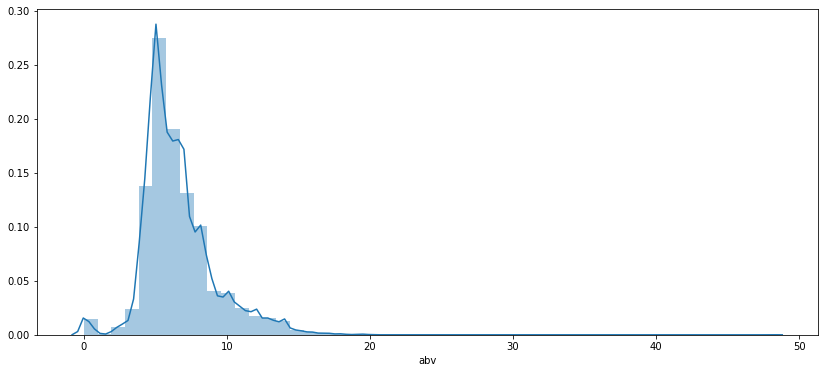

Top 10 highest abv beers
                                       beer_name   abv  rb_user_rating
32019           Cottage Delight Captain Suburbia  48.0            3.80
4471   Schorschbräu Schorschbock Ice 34 Oak Aged  34.0            0.00
4746                        Samuel Adams Utopias  28.0            4.11
4065    The Bruery Black Tuesday - Grand Reserve  21.5            3.23
2230     The Bruery Black Tuesday Imperial Stout  20.3            4.14


In [14]:
# histogram of beer strengths
print("ABV levels per Beer")
print(df.drop_duplicates(['beer_name']).abv.describe())
plt.figure(figsize=(14,6))
ax = sns.distplot(df.drop_duplicates(['beer_name']).abv)
plt.show()
print("Top 10 highest abv beers")
print(df.drop_duplicates(['beer_name']).sort_values('abv',ascending=False)[['beer_name','abv','rb_user_rating']].head(5))


User ratings per Beer
count    23675.000000
mean         3.468000
std          0.560176
min          0.000000
25%          3.220000
50%          3.560000
75%          3.800000
max          5.000000
Name: rb_user_rating, dtype: float64


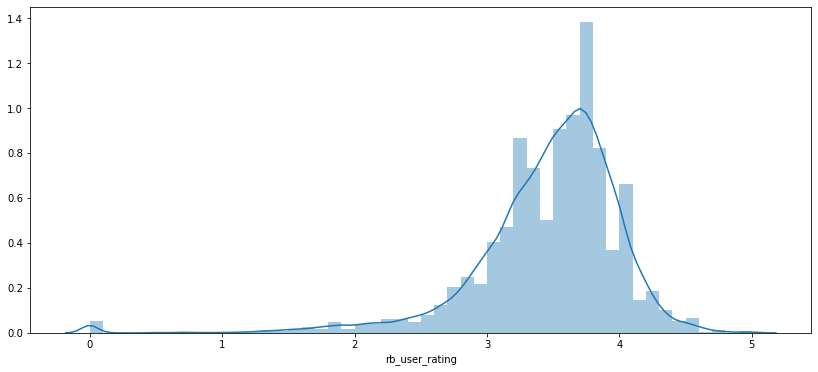

Top 10 highest rated beers
                                               beer_name  rb_user_rating
6214                                              Static             5.0
30419                  BreWskey Brew Juice Berry Poppins             5.0
6680                           German Kraft Keller König             5.0
17342  Une Année Feats of Strength BA Blueberry & Cin...             5.0
36177                     Rudgate Nightingale Golden Ale             5.0
6553                           Cold Iron Drift North IPA             5.0
21523                     Flying Bike Phinneywood Porter             5.0
16164                          Modern Times Mostra Tones             5.0
6821                            Key City This Is The Way             5.0
7414                                   18th Street Beast             5.0
Bottom 10 lowest rated beers
                                             beer_name  rb_user_rating
4349              Brawling Bear The Fight Round 2: ESB             0.0

In [15]:
# rb avg user rating histogram
print("User ratings per Beer")
print(df.drop_duplicates(['beer_name']).rb_user_rating.describe())
plt.figure(figsize=(14,6))
ax = sns.distplot(df.drop_duplicates(['beer_name']).rb_user_rating)
plt.show()
print("Top 10 highest rated beers")
print(df.drop_duplicates(['beer_name']).sort_values('rb_user_rating',ascending=False)[['beer_name','rb_user_rating']].head(10))
print("Bottom 10 lowest rated beers")
print(df.drop_duplicates(['beer_name']).sort_values('rb_user_rating')[['beer_name','rb_user_rating']].head(10))


In [16]:
# rb avg number of ratings per beer histogram

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45671 entries, 0 to 45670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beer_name         45671 non-null  object 
 1   beer_rating       45671 non-null  float64
 2   brewery_location  45671 non-null  object 
 3   brewery_name      45671 non-null  object 
 4   review_content    45671 non-null  object 
 5   reviewer_name     45671 non-null  object 
 6   latitude          45671 non-null  float64
 7   longitude         45671 non-null  float64
 8   country           45671 non-null  object 
 9   flag              45671 non-null  object 
 10  type              45671 non-null  object 
 11  abv               45671 non-null  float64
 12  rb_overall_score  45671 non-null  object 
 13  rb_style_score    45671 non-null  object 
 14  rb_user_rating    45671 non-null  float64
 15  rb_rating_number  45671 non-null  float64
dtypes: float64(6), object(10)
memory usage: 

In [18]:
df.sort_values("rb_user_rating",ascending=False)

,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name,latitude,longitude,country,flag,type,abv,rb_overall_score,rb_style_score,rb_user_rating,rb_rating_number
6821,Key City This Is The Way,5.0,"Vicksburg, Mississippi",Key City Brewing Company,I love this Saison! It's fermented with a ble...,slh61357,32.352842,-90.877734,United States of America,🇺🇸,Saison / Farmhouse / Grisette,6.0,-,-,5.0,0.0
21523,Flying Bike Phinneywood Porter,5.0,"Seattle, Washington",Flying Bike Cooperative Brewery,A rich and robust Porter with tones of chocola...,nw_gser,47.603832,-122.330062,United States of America,🇺🇸,Porter,6.7,-,-,5.0,1.0
17342,Une Année Feats of Strength BA Blueberry & Cin...,5.0,"Niles, Illinois",Une Année Brewery,750-ml bottle from source. good briefly cascad...,zebra,42.028932,-87.812235,United States of America,🇺🇸,Stout - Imperial Flavored,13.5,-,-,5.0,1.0
22983,Modern Times Mostra Tones,4.2,"San Diego, California",Modern Times Beer,22 ounce bottle shared by Jason. A chocolate b...,drfabulous,32.717421,-117.162771,United States of America,🇺🇸,Stout - Imperial Flavored,14.8,-,-,5.0,1.0
6214,Static,5.0,"Saint Petersburg, Florida",Cage Brewing,Citrus like super hopped IPA. Very drinkable ...,Raysfan,27.770380,-82.669508,United States of America,🇺🇸,IPA,7.0,-,-,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,Böcken-Bräu Seebeere,1.6,"Haltern am See, North Rhine-Westphalia",Böcken-Bräu,Sehr trockener Beginn ohne wirkliches Aroma - ...,Koelschtrinker,51.743052,7.187221,Germany,🇩🇪,Flavored - Fruit,5.5,-,-,0.0,1.0
42573,Ale Asylum Fvck Covid,3.0,"Madison, Wisconsin",Ale Asylum,Pounder can poured a hazy yellow with a small ...,Ratman197,43.074761,-89.383761,United States of America,🇺🇸,Pilsener / Pils / Pilsner,4.0,-,-,0.0,0.0
15592,Persephone Missing,4.0,"Gibsons, British Columbia",Persephone Brewing,"355mL can, courtesy fo fiulijn (thanks man), p...",mcberko,49.400620,-123.508919,Canada,🇨🇦,Pilsener / Pils / Pilsner,5.0,-,-,0.0,0.0
4304,Böcken-Bräu Seezitrone,1.9,"Haltern am See, North Rhine-Westphalia",Böcken-Bräu,"Weich herber, dumpf fruchtiger Beginn, Zitrone...",Koelschtrinker,51.743052,7.187221,Germany,🇩🇪,Flavored - Fruit,7.3,-,-,0.0,1.0
